## Housing Prices in Singapore

This exercise will attempt to predict resale housing prices in Singapore

In [1]:
# data 
import pandas as pd

# directories
import os
#os.getcwd() #get working directory

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [2]:
# Set the relative director for training data
root_dir = "~"
train_data_dir = os.path.join(root_dir,"pythonprojects","Yidu","HW1 Data","train.csv")
test_data_dir = os.path.join(root_dir,"pythonprojects","Yidu","HW1 Data","test.csv")

# read the data frame
train_data = pd.read_csv(train_data_dir)
test_data = pd.read_csv(test_data_dir)

# Print out number of instances for each dataset
print("Training Data has {0} instances".format(len(train_data)))
print("Test Data has {0} instances".format(len(test_data)))

Training Data has 607992 instances
Test Data has 151999 instances


In [3]:
print(train_data.columns)
train_data.describe()

Index(['index', 'block', 'flat_model', 'flat_type', 'floor_area_sqm',
       'lease_commence_date', 'month', 'resale_price', 'storey_range',
       'street_name', 'town', 'latitude', 'longitude', 'postal_code', 'floor'],
      dtype='object')


,index,floor_area_sqm,lease_commence_date,resale_price,latitude,longitude,postal_code,floor
count,607992.000000,607992.000000,607992.000000,6.079920e+05,607992.000000,607992.000000,607992.000000,607992.000000
mean,303995.500000,95.542603,1986.547621,2.815431e+05,1.360492,103.838869,530443.042961,7.457277
std,175512.316769,26.191181,8.792567,1.414718e+05,0.041371,0.074209,180497.930226,4.504902
min,0.000000,28.000000,1966.000000,5.600000e+03,1.270380,103.685228,50004.000000,2.000000
25%,151997.750000,72.000000,1980.000000,1.750000e+05,1.333037,103.772579,460501.000000,5.000000
50%,303995.500000,93.000000,1985.000000,2.630000e+05,1.353276,103.842318,550140.000000,8.000000
75%,455993.250000,115.000000,1993.000000,3.688000e+05,1.379559,103.897606,650503.000000,11.000000
max,607991.000000,307.000000,2015.000000,1.180000e+06,1.457071,103.987805,825195.000000,50.000000


#### The Plan
1. Data Exploration
2. Splitting Postal Code
3. Plotting Housing Prices 

### Data Exploration

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607992 entries, 0 to 607991
Data columns (total 15 columns):
index                  607992 non-null int64
block                  607992 non-null object
flat_model             607992 non-null object
flat_type              607992 non-null object
floor_area_sqm         607992 non-null float64
lease_commence_date    607992 non-null int64
month                  607992 non-null object
resale_price           607992 non-null float64
storey_range           607992 non-null object
street_name            607992 non-null object
town                   607992 non-null object
latitude               607992 non-null float64
longitude              607992 non-null float64
postal_code            607992 non-null int64
floor                  607992 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 69.6+ MB


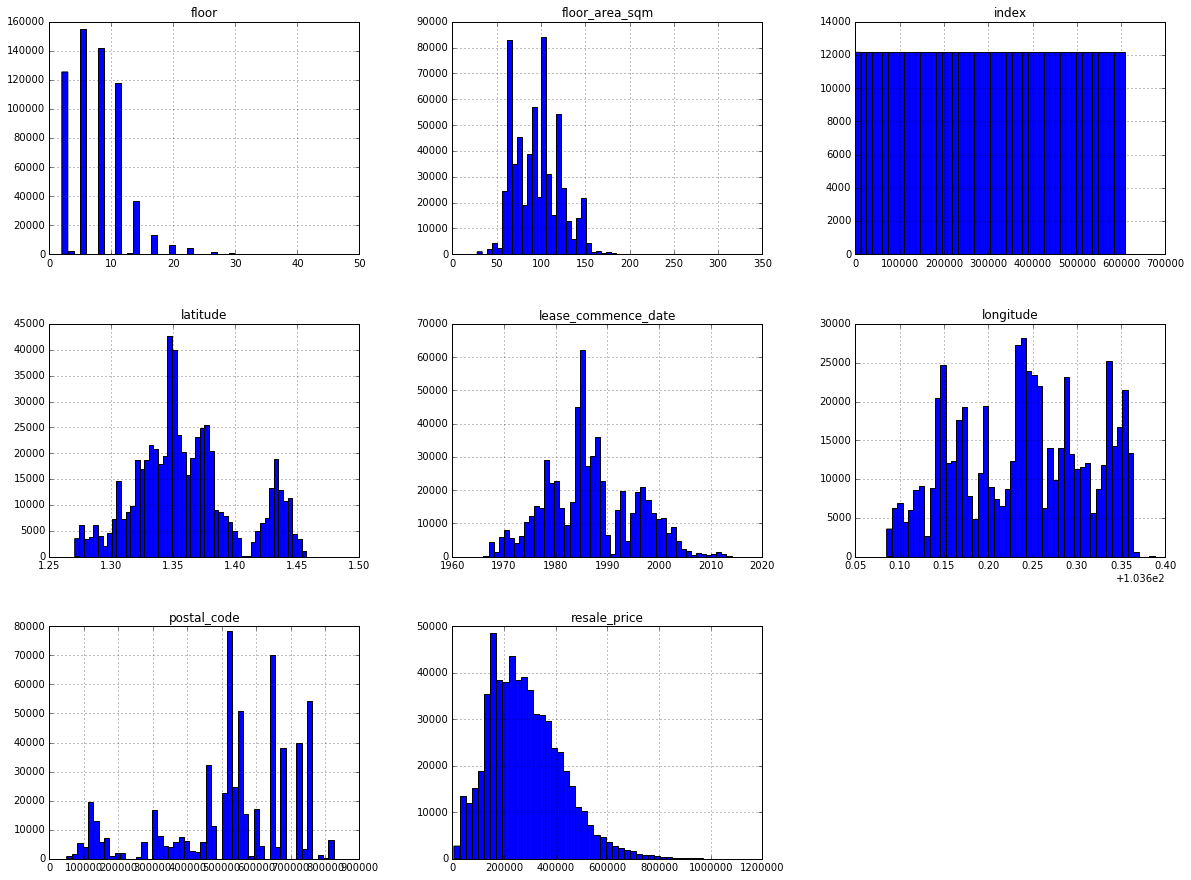

In [5]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

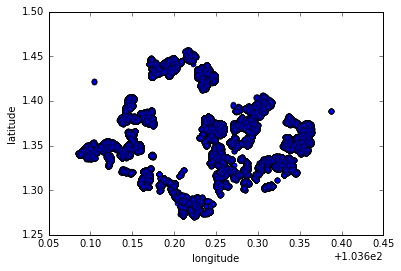

In [6]:
train_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

In [7]:
# Splitting y_train
y_train_data = train_data.loc[:,'resale_price']
y_train_data.head()

0    312000.0
1    415000.0
2    545000.0
3      7000.0
4    278000.0
Name: resale_price, dtype: float64

In [8]:
# Getting x_train_data and x_test_data

x_train_data = train_data.loc[:, train_data.columns != 'resale_price']
x_train_data = x_train_data.loc[:, x_train_data.columns != 'index']
x_train_data.info()

x_test_data = test_data
x_test_data = x_test_data.loc[:, x_test_data.columns != 'index']
x_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607992 entries, 0 to 607991
Data columns (total 13 columns):
block                  607992 non-null object
flat_model             607992 non-null object
flat_type              607992 non-null object
floor_area_sqm         607992 non-null float64
lease_commence_date    607992 non-null int64
month                  607992 non-null object
storey_range           607992 non-null object
street_name            607992 non-null object
town                   607992 non-null object
latitude               607992 non-null float64
longitude              607992 non-null float64
postal_code            607992 non-null int64
floor                  607992 non-null int64
dtypes: float64(3), int64(3), object(7)
memory usage: 60.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151999 entries, 0 to 151998
Data columns (total 13 columns):
block                  151999 non-null object
flat_model             151999 non-null object
flat_type              15

### Data Preparation

In [9]:
x_train_data.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,storey_range,street_name,town,latitude,longitude,postal_code,floor
0,250,MODEL A,4 ROOM,105.0,1992,2001-11,04 TO 06,BISHAN ST 22,BISHAN,1.361615,103.843937,570250,5
1,166,IMPROVED,5 ROOM,121.0,1987,1996-07,10 TO 12,YISHUN RING RD,YISHUN,1.436284,103.831607,760166,11
2,306D,PREMIUM APARTMENT,4 ROOM,93.0,2012,2017-04,10 TO 12,PUNGGOL DR,PUNGGOL,1.406081,103.906438,824306,11
3,33,IMPROVED,1 ROOM,29.0,1969,1990-07,04 TO 06,TAMAN HO SWEE,BUKIT MERAH,1.288226,103.831906,161033,5
4,312,NEW GENERATION,4 ROOM,98.0,1985,2000-07,10 TO 12,SERANGOON AVE 2,SERANGOON,1.353288,103.865796,550312,11


In [10]:
# uniqueness of datasets
print("street_name: ", len(set(x_train_data['street_name'])))
print("town: ", len(set(x_train_data['town'])))
print("flat_model: ", len(set(x_train_data['flat_model'])))
print("storey_range:", len(set(x_train_data['storey_range'])))
print("floor:", len(set(x_train_data['floor'])))
print("flat model: ", len(set(x_train_data['flat_model'])))
print("postal code: ", len(set(x_train_data['postal_code'])))
print("block: ", len(set(x_train_data['block'])))

street_name:  542
town:  27
flat_model:  20
storey_range: 25
floor: 22
flat model:  20
postal code:  8742
block:  2178


In [11]:
# creating new variables
x_train_data['lease_age'] = 2018 - x_train_data['lease_commence_date']
x_test_data['lease_age'] = 2018 - x_test_data['lease_commence_date']

In [12]:
# dropping variables

# street name - TOO MANY UNIQUE POINTS, PROBLEM WITH ENCODING
x_train_data = x_train_data.loc[:, x_train_data.columns != 'street_name']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'street_name']

# floor and storey range too similar, will drop STOREY RANGE 
x_train_data = x_train_data.loc[:, x_train_data.columns != 'storey_range']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'storey_range']

# lease age > lease commence date, dropp lease commence date
x_train_data = x_train_data.loc[:, x_train_data.columns != 'lease_commence_date']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'lease_commence_date']

# dropping postal code - since we already have town
x_train_data = x_train_data.loc[:, x_train_data.columns != 'postal_code']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'postal_code']

# dropping block - too unique, probably not that important
x_train_data = x_train_data.loc[:, x_train_data.columns != 'block']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'block']

# dropping lat and long - already have town
x_train_data = x_train_data.loc[:, x_train_data.columns != 'latitude']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'latitude']

x_train_data = x_train_data.loc[:, x_train_data.columns != 'longitude']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'longitude']

# dropping month - already have lease_age
x_train_data = x_train_data.loc[:, x_train_data.columns != 'month']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'month']


In [13]:
# check before ecoding
x_train_data.head()

,flat_model,flat_type,floor_area_sqm,town,floor,lease_age
0,MODEL A,4 ROOM,105.0,BISHAN,5,26
1,IMPROVED,5 ROOM,121.0,YISHUN,11,31
2,PREMIUM APARTMENT,4 ROOM,93.0,PUNGGOL,11,6
3,IMPROVED,1 ROOM,29.0,BUKIT MERAH,5,49
4,NEW GENERATION,4 ROOM,98.0,SERANGOON,11,33


In [14]:
set(x_train_data['flat_model'])

{'2-ROOM',
 'ADJOINED FLAT',
 'APARTMENT',
 'DBSS',
 'IMPROVED',
 'IMPROVED-MAISONETTE',
 'MAISONETTE',
 'MODEL A',
 'MODEL A-MAISONETTE',
 'MODEL A2',
 'MULTI GENERATION',
 'NEW GENERATION',
 'PREMIUM APARTMENT',
 'PREMIUM APARTMENT LOFT',
 'PREMIUM MAISONETTE',
 'SIMPLIFIED',
 'STANDARD',
 'TERRACE',
 'TYPE S1',
 'TYPE S2'}

In [15]:
set(x_train_data['flat_type'])

{'1 ROOM',
 '2 ROOM',
 '3 ROOM',
 '4 ROOM',
 '5 ROOM',
 'EXECUTIVE',
 'MULTI GENERATION'}

In [16]:
#filling NA's with the median of the column:
x_train_data = x_train_data.fillna(x_train_data.median())
x_test_data = x_test_data.fillna(x_test_data.median())

In [17]:
x_train_data.describe()

,floor_area_sqm,floor,lease_age
count,607992.000000,607992.000000,607992.000000
mean,95.542603,7.457277,31.452379
std,26.191181,4.504902,8.792567
min,28.000000,2.000000,3.000000
25%,72.000000,5.000000,25.000000
50%,93.000000,8.000000,33.000000
75%,115.000000,11.000000,38.000000
max,307.000000,50.000000,52.000000


One Hot Encoding

In [18]:
x_train_data_encoded = pd.get_dummies(x_train_data)
print(x_train_data_encoded.head())

   floor_area_sqm  floor  lease_age  flat_model_2-ROOM  \
0           105.0      5         26                0.0   
1           121.0     11         31                0.0   
2            93.0     11          6                0.0   
3            29.0      5         49                0.0   
4            98.0     11         33                0.0   

   flat_model_ADJOINED FLAT  flat_model_APARTMENT  flat_model_DBSS  \
0                       0.0                   0.0              0.0   
1                       0.0                   0.0              0.0   
2                       0.0                   0.0              0.0   
3                       0.0                   0.0              0.0   
4                       0.0                   0.0              0.0   

   flat_model_IMPROVED  flat_model_IMPROVED-MAISONETTE  flat_model_MAISONETTE  \
0                  0.0                             0.0                    0.0   
1                  1.0                             0.0              

In [ ]:
# visualize
print(x_train_data_encoded.head())

   floor_area_sqm  floor  lease_age  flat_model_2-ROOM  \
0           105.0      5         26                0.0   
1           121.0     11         31                0.0   
2            93.0     11          6                0.0   
3            29.0      5         49                0.0   
4            98.0     11         33                0.0   

   flat_model_ADJOINED FLAT  flat_model_APARTMENT  flat_model_DBSS  \
0                       0.0                   0.0              0.0   
1                       0.0                   0.0              0.0   
2                       0.0                   0.0              0.0   
3                       0.0                   0.0              0.0   
4                       0.0                   0.0              0.0   

   flat_model_IMPROVED  flat_model_IMPROVED-MAISONETTE  flat_model_MAISONETTE  \
0                  0.0                             0.0                    0.0   
1                  1.0                             0.0              

### Model Selection

Linear

In [ ]:
import sklearn.linear_model
from sklearn.model_selection import cross_val_score

model = sklearn.linear_model.LinearRegression()
scores = cross_val_score(model, x_train_data_encoded, y_train_data,
                         scoring="neg_mean_squared_error", cv=3)
tree_rmse_scores = np.sqrt(-scores)